# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

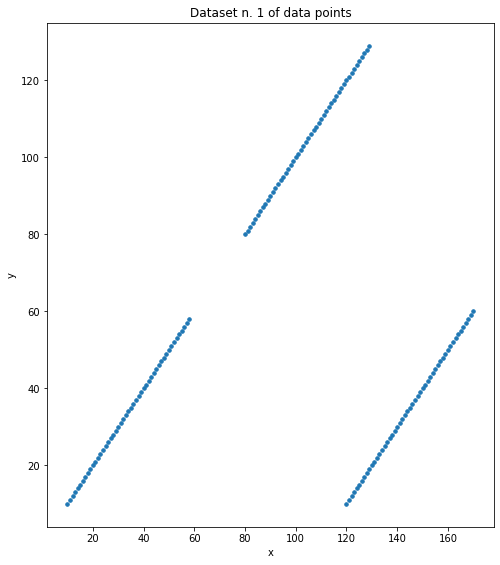

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=7)

plt.show()

The following is the program for plotting the dataset n.2

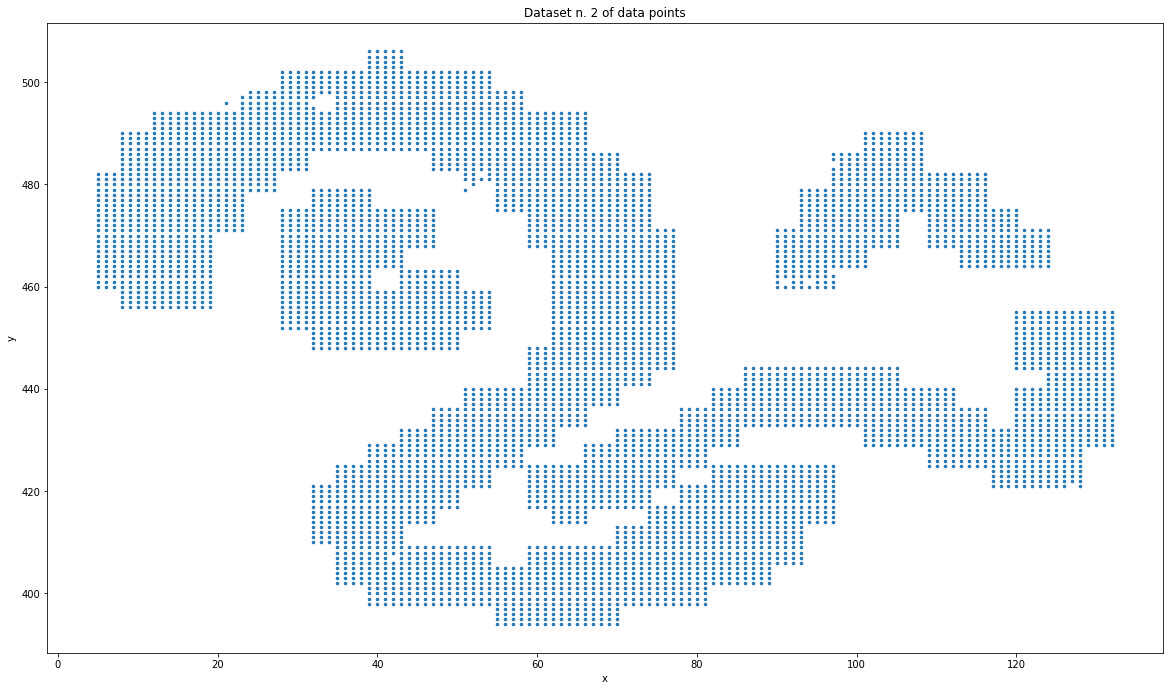

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=5)

plt.show()

The following is the program for plotting the dataset n.3

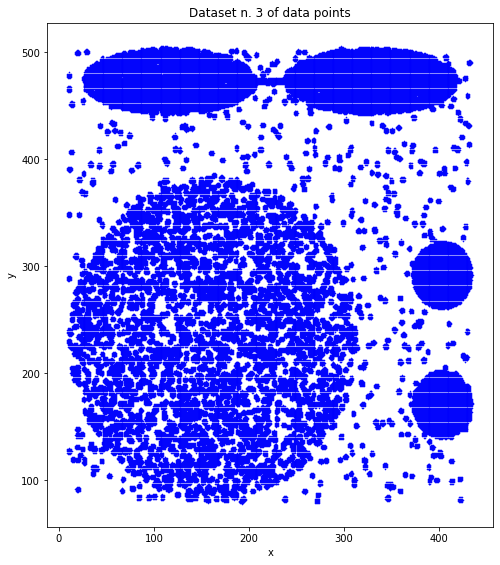

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

# this dataset has clusters with different types of difficulties (for example the two clusters on the top have a line of points connecting that link
# them toghether)

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5) # random initialization

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

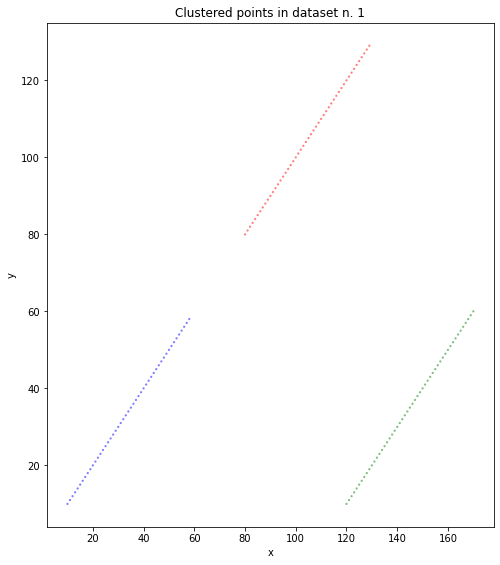

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu] # x coordinates of data points per cluster
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu] # y coordinates of data points per cluster
    plt.scatter(data_list_x, data_list_y, s=5, edgecolors='none', c=color[clu], alpha=0.5) # by changing s parameter we can modify points size for better visibility

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [7]:
# load data of second dataset
file_path="./datasets/"
file_name2="dataset-DBSCAN.csv"     
data2, feature_names2, n_samples2, n_features2 = load_data(file_path, file_name2)

# train K-Means
k = 4 # we can see 4 clusters in the previous plot
kmeans2 = KMeans(k, random_state=27)
kmeans2.fit(data2)

# i=0
# for i in range(n_samples1):
    # print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    # print("in cluster n."+str(kmeans1.labels_[i]))

print('K-Means trained on dataset n.2')

K-Means trained on dataset n.2


In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

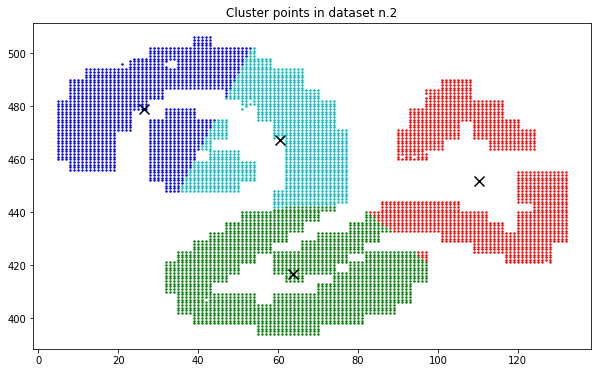

In [8]:
import pandas as pd


df2 = pd.DataFrame([data2[:,0], data2[:,1], kmeans2.labels_[:]]).T

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

plt.figure(figsize=(10,6))
plt.title('Cluster points in dataset n.2')
for cluster in range(k):
    # plot cluster's points
    points = df2[df2[2] == cluster]
    plt.scatter(points[0], points[1], s=2, c=color[cluster])
    # add also centroids of each cluster
    centr = kmeans2.cluster_centers_[cluster]
    plt.scatter(centr[0], centr[1], marker='x', s=100, c='black')


As we can see the clusters are wrong.
K-Means fail to recognize the clusters because it assigns each point to the centroid with the lower distance. This is clearer if we look at centroid's positions (black crosses), the model is not able to recognize the shape of each cluster and it tends to mix points relying only on the distance calculated.

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [9]:
# load data of third dataset
file_path="./datasets/"
file_name3="CURE-complete.csv"
data3, feature_names3, n_samples3, n_features3 = load_data(file_path, file_name3)

# train K-Means
k = 5 # we can see 4 clusters in the previous plot
kmeans3 = KMeans(k, random_state=27)
kmeans3.fit(data3)

# i=0
# for i in range(n_samples1):
    # print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    # print("in cluster n."+str(kmeans1.labels_[i]))

print('K-Means trained on dataset n.3')

K-Means trained on dataset n.3


In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

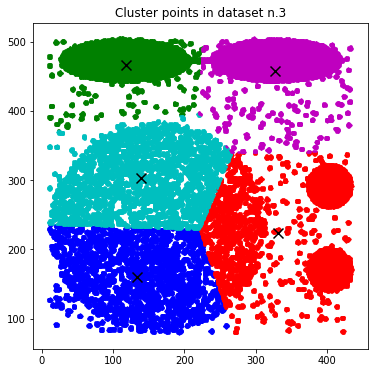

In [10]:
df3 = pd.DataFrame([data3[:,0], data3[:,1], kmeans3.labels_[:]]).T

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

plt.figure(figsize=(6,6))
plt.title('Cluster points in dataset n.3')
for cluster in range(k):
    # plot cluster's points
    points = df3[df3[2] == cluster]
    plt.scatter(points[0], points[1], s=2, c=color[cluster])
    # add also the centroids of each cluster
    centr = kmeans3.cluster_centers_[cluster]
    plt.scatter(centr[0], centr[1], marker='x', s=100, c='black')


K-Means has good results on the two clusters in the upper part, but terrible ones with the other three.
This is due to the noise points, that move centroids of the two small clusters on the right and make the model wrong.
This new position don't let the model correctly identify the two small clusters, merging them together in a single one and forcing the algorithm to find a new place for the last centroid.
This creates the wrong division of the big cluster in three parts.

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [11]:
from sklearn.metrics import silhouette_score


def tuning_k(data, max_k=10):
    '''
    Function that return the optimal number of clusters k (found over the specified range of values) for K-Means that maximizes silhouette's score.
    '''
    scores = pd.Series([], dtype=float)
    for k in np.arange(2, max_k+1):
        model = KMeans(n_clusters=k, random_state=27)
        model.fit(data)
        labels = model.labels_
        score = silhouette_score(data, labels)
        scores[k] = score
    # print(f'The best number of cluster is {best_k} with silhouette\'s value of {best_score}, found over {max_k} iteration.')
    return scores.idxmax(), scores



As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

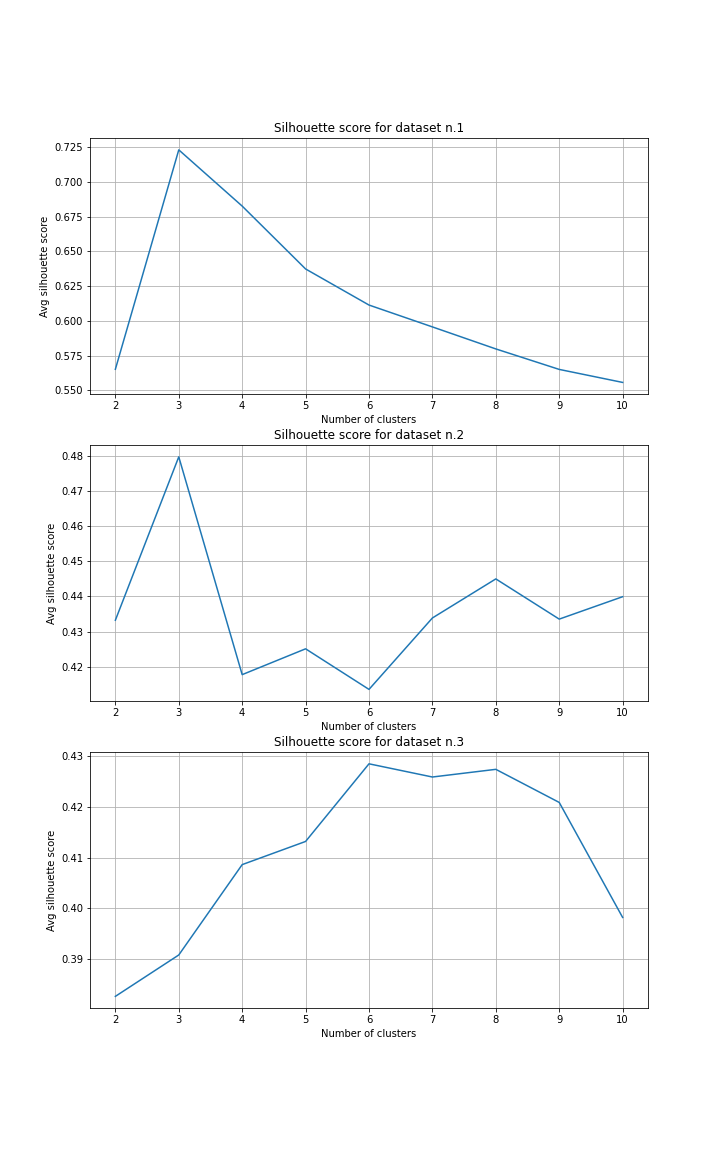

In [12]:
from PIL import Image

try:
    im = Image.open('./plots/silhouette.png')
    im.show()
except Exception as e:
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,16))
    i = 0
    for ax, dataset in zip(axes, [data1, data2, data3]):
        i += 1
        # make tuning
        max_k, all_scores = tuning_k(dataset)
        # plot results
        ax.grid()
        ax.set_title(f'Silhouette score for dataset n.{i}')
        ax.set_xlabel('Number of clusters')
        ax.set_ylabel('Avg silhouette score')
        ax.plot(all_scores)
    # to avoid long operation while re-run we save the figure and just load it if exist
    fig.savefig('./plots/silhouette.png')


In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

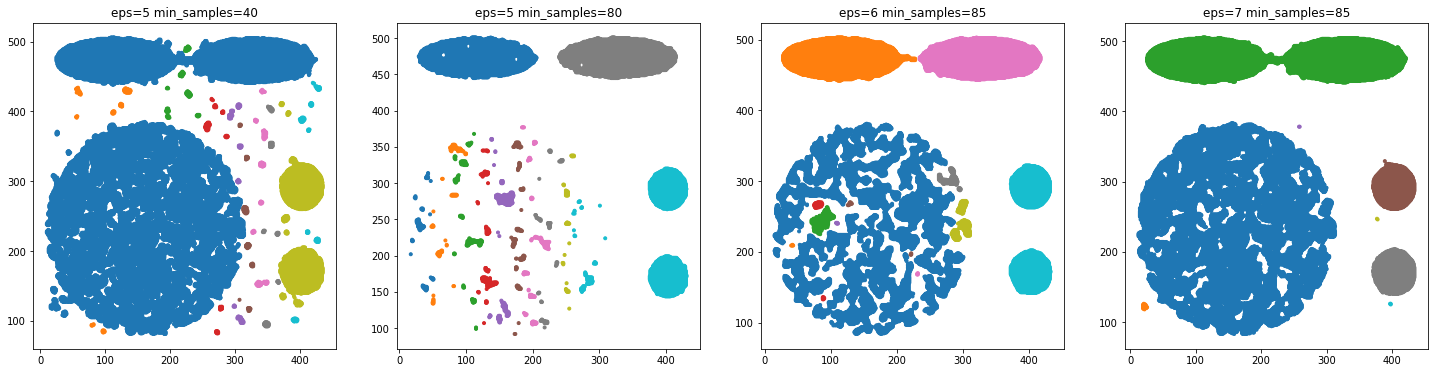

In [13]:
from sklearn.cluster import DBSCAN


data = data3 # select dataset

# values for eps and min_samples that will be tried
eps_vals = [5, 5, 6, 7]
min_samples_vals = [40, 80, 85, 85]

fig, axes = plt.subplots(ncols=4, figsize=(25,6))

for eps, min_samples, ax in zip(eps_vals, min_samples_vals, axes):
    # build and train the model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    # take indexes of points
    labels = dbscan.labels_
    core_points = dbscan.core_sample_indices_
    # plot the results
    ax.scatter(data[core_points,0], data[core_points,1], c=labels[core_points], cmap='tab10', marker='.')
    ax.set_title(f'eps={eps} min_samples={min_samples}')


NOTE: We made four computations, trying differents settings of parameters.
By these experiments we understand that:
1. to identify the clusters on the top we must increase _min\_samples_ and have a low value of _eps_, so that DBSCAN will cut the line of points between them.
2. to identify the big cluster we need both low or both high values of the two parameters, otherwise there will be a lot of noise points.
3. to identify the two clusters on the right we must set high values for both parameters, otherwise they will be considered a single cluster.
4. to remomve the noise points, high value of _min\_samples_ are required, because they are not so near and they won't be enough to reach the minimum value of points to became a cluster.

It is difficult to find a combination of values such that identifies all the clusters' types, we have to choose on wich we want to focus. 
This is a well known problem of DBSCAN.

The best results have been obtained with _eps_=7 and _min\_samples_=85 since we are able to recognize the big cluster, the two small clusters on the right and also we have really few noise points identified as clusters.


In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

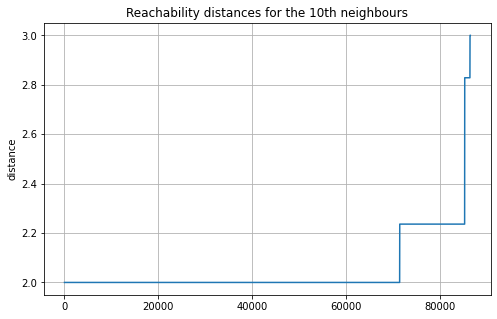

In [21]:
from sklearn.neighbors import NearestNeighbors


data = data3
k = 10 # we consider the 10th nearest neighbour

nn = NearestNeighbors(n_neighbors=k) # calculate euclidean distance between points
nn.fit(data)
dist, indx = nn.kneighbors(data)
# dist = all reachability distances between each point in the dataset and its first 10 neighbours
# indx = first k=10 neighbours' indexes for each point in the dataset

# we just need to take the last value (the 10th) of each array of distances
reach_distances = [d[k-1] for d in dist]

# sorting
reach_distances = np.sort(reach_distances)

# plot the distances
plt.figure(figsize=(8,5))
plt.title('Reachability distances for the 10th neighbours')
plt.ylabel('distance')
plt.grid()
plt.plot(reach_distances)


Text(0.5, 1.0, 'eps=2.25 minpts=10')

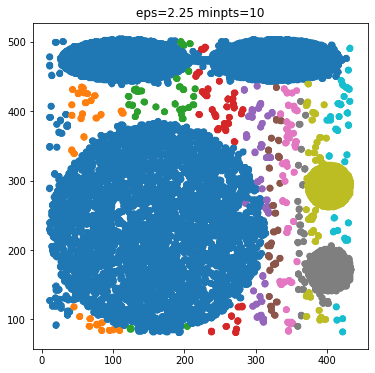

In [22]:

e = 2.25 # the elbow of the graph above is at this value
minpts = 10
# train DBSCAN with this parameters
dbscan = DBSCAN(eps=e, min_samples=minpts)
dbscan.fit(data)

# take indexes of points
labels = dbscan.labels_
core_points = dbscan.core_sample_indices_
# plot the results
plt.figure(figsize=(6,6))
plt.scatter(data[core_points,0], data[core_points,1], c=labels[core_points], cmap='tab10', marker='.')
plt.title(f'eps={e} minpts={minpts}')


NOTE: Using this parameters we obtain good results on the nig cluster and also on the two small clusters on the right but we are not able to identify the two clusters on the top and we have many noise points.